### IMPLEMENTACION DE LA REGRESION LOGISTICA

#### ESTE EJEMPLO ES UNA PREDICCION DE REGRESION LOGISTICA PARA PREDICCIONES BANCARIAS

In [1]:
import pandas as pd
import numpy as np

In [2]:
data= pd.read_csv("../python-ml-course-master/datasets/bank/bank.csv", sep=";")

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
#Columna interesada en si adquieren o no el producto de inversion es la Y
data["y"] = (data["y"]== "yes").astype(int)

In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [6]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [7]:
#Realizo una modificacion en los nombres de los valores de educacion para que sean mas entendibles
data["education"] = np.where(data["education"]=="basic.9y","Basic",data["education"])
data["education"] = np.where(data["education"]=="basic.6y","Basic",data["education"])
data["education"] = np.where(data["education"]=="basic.4y","Basic",data["education"])

In [8]:
data["education"] = np.where(data["education"]=="professional.course","Professional Course",data["education"])
data["education"] = np.where(data["education"]=="high.school","High School",data["education"])
data["education"] = np.where(data["education"]=="university.degree","University Degree",data["education"])

In [9]:
data["education"] = np.where(data["education"]=="illiterate","Illiterate",data["education"])
data["education"] = np.where(data["education"]=="unknown","Unknown",data["education"])

In [10]:
#Analisis exploratorio de los datos de la columna que me interesa
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [11]:
data.groupby("y").mean() #Promedio de mi variable de interes, agrupada

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [12]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'frecuencia de compra')

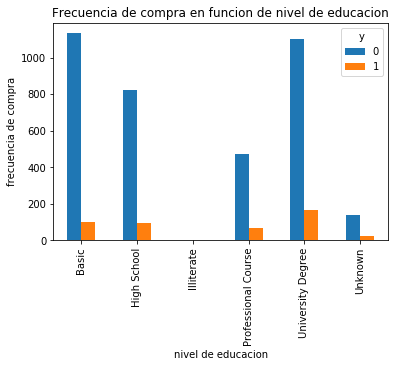

In [13]:
#Vamos a hacer una tabla de contingencia para visualizar la relacion entre la frecuencia de compras segun el nivel de estudio
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en funcion de nivel de educacion")
plt.xlabel("nivel de educacion")
plt.ylabel("frecuencia de compra")

Text(0.5, 1.0, 'Diagrama apilado del estado civil vs si realiza compra o no')

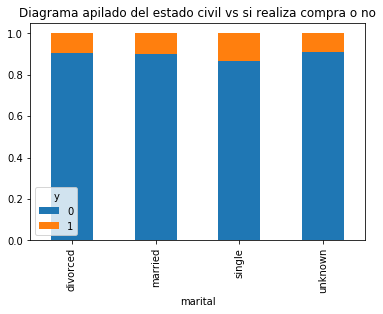

In [14]:
table = pd.crosstab(data.marital,data.y)
table.div(table.sum(axis=1).astype(float), axis=0).plot(kind="bar", stacked= True) #Realizo la proporcion
plt.title("Diagrama apilado del estado civil vs si realiza compra o no")

### Conversion de las variables categoricas a dummies

In [15]:
categories = ["job", "default","marital","education","housing","loan","contact","month","day_of_week","poutcome"]
for category in categories:
    cat_list = "cat"+"_"+ category
    cat_dummies= pd.get_dummies(data[category], prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new

In [16]:
data_columns=data.columns.values.tolist()

In [17]:
to_keep=[ v for v in data_columns if v not in categories]

In [18]:
bank_data = data[to_keep]
bank_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,1,0,0,0,0,1,0


In [19]:
#Voy a separar mi variable de interes a ser predecida, la sacare del arreglo 
bank_data_vars = bank_data.columns.values.tolist()
Y=['y'] #Mi variable a predecir
X = [v for v in bank_data_vars if v not in Y] #mi Arreglo con la informacion de las variables predictoras

### SELECCION DE RASGOS PARA EL MODELO LOGISTICO

In [ ]:
#ME VOY A QUEDAR CON 12 VARIABLES PREDICTORAS

In [23]:
n=12
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [24]:
lr = LogisticRegression()

In [27]:
rfe= RFE(lr,n)
rfe= rfe.fit(bank_data[X],bank_data[Y].values.ravel())

C:\Users\alvaro.lopez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alvaro.lopez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alvaro.lopez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alvaro.lopez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alvaro.lopez\AppData\Local\Continuum\anacon

In [28]:
rfe.support_ #Me indica cuales son las variables de todas las que le pase (y elige 12) van a quedar presentes

array([False, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True, False,  True, False, False,
       False, False, False, False,  True, False,  True])

In [32]:
z=list(zip(bank_data_vars,rfe.support_, rfe.ranking_)) #listado de las variables mostrando cuales se quedan y cuales no 

In [33]:
z

[('age', False, 35),
 ('duration', False, 40),
 ('campaign', False, 18),
 ('pdays', False, 44),
 ('previous', True, 1),
 ('emp.var.rate', False, 14),
 ('cons.price.idx', False, 27),
 ('cons.conf.idx', False, 25),
 ('euribor3m', True, 1),
 ('nr.employed', False, 39),
 ('y', False, 22),
 ('job_admin.', False, 3),
 ('job_blue-collar', True, 1),
 ('job_entrepreneur', False, 37),
 ('job_housemaid', False, 2),
 ('job_management', False, 41),
 ('job_retired', True, 1),
 ('job_self-employed', False, 5),
 ('job_services', False, 30),
 ('job_student', False, 33),
 ('job_technician', False, 12),
 ('job_unemployed', False, 47),
 ('job_unknown', False, 36),
 ('default_no', False, 34),
 ('default_unknown', False, 49),
 ('default_yes', False, 19),
 ('marital_divorced', False, 43),
 ('marital_married', False, 31),
 ('marital_single', False, 50),
 ('marital_unknown', False, 26),
 ('education_Basic', False, 13),
 ('education_High School', False, 48),
 ('education_Illiterate', False, 21),
 ('education_Pr

In [34]:
columnas_decisivas= ["previous","euribor3m","job_blue-collar","job_retired","month_aug","month_dec","month_jul","month_jun","month_mar","month_nov","day_of_week_wed","poutcome_nonexistent"]

In [38]:
X= bank_data[columnas_decisivas]
Y= bank_data["y"]

### IMPLEMENTACION DEL MODELO LOGISTICO CON STATSMODEL.API 

In [39]:
import statsmodels.api as sm

In [41]:
logit_model = sm.Logit(Y,X) #En este caso primero es la vble a predecir, luego las predictoras

In [42]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.291770
         Iterations 7


In [43]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.155     
Dependent Variable:   y                 AIC:               2427.6025 
Date:                 2019-10-31 16:30  BIC:               2503.4828 
No. Observations:     4119              Log-Likelihood:    -1201.8   
Df Model:             11                LL-Null:           -1422.9   
Df Residuals:         4107              LLR p-value:       6.4492e-88
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous             -0.1229   0.0700  -1.7545 0.0793 -0.2601  0.0144
euribor3m            -0.6049   0.0383 -15.7882 0.0000 -0.6800 -0.5298
job_blue-collar      -0.5032   0.1519  -3.3136 0.0009 -0.8009 -0.2056
job_retired           0.2235   0.2191   1.0205 0.3075 -0.2058  0.6529
month_aug             0.6048   0.1759   3.4374 0.0006  0.2600  0.9497
month_dec             1.1358   0.4493   2.5281 0.0115  0.2552  2.0163
month_jul             1.0327   0.1910   5.4071 0.0000  0.6584  1.4070
month_jun             1.0775   0.1752   6.1493 0.0000  0.7341  1.4210
month_mar             1.6448   0.3139   5.2407 0.0000  1.0297  2.2600
month_nov             0.3828   0.1950   1.9634 0.0496  0.0007  0.7649
day_of_week_wed      -0.0649   0.1391  -0.4665 0.6409 -0.3375  0.2077
poutcome_nonexistent -0.7753   0.1221  -6.3492 0.0000 -1.0147 -0.5360
=====================================================================

"""

### Implementación del modelo con scikit-learn

In [44]:
from sklearn import linear_model

In [45]:
logit_model = linear_model.LogisticRegression()

In [46]:
logit_model.fit(X,Y)

C:\Users\alvaro.lopez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
logit_model.score(X,Y)

0.8963340616654528